In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import great

# Exercise 1 - Simple test 

The first test is non-relativistic (Newtonian) and without gravity. This test is described in the appendix A of Torres-Forné et al 2018 ([arXiv:1708.01920](https://arxiv.org/abs/1708.01920)).

Consider a sphere of radius $R=1$ with constant density $\rho=1$ and constant speed of sound $c_s^2=1$. Consider an ideal EOS 

$$P=\rho\epsilon (\Gamma-1)$$

with adiabatic index $\Gamma=4/3$. The definition of adiabatic index and the EOS allow to compute the pressure, $P$, and the specific internal energy, $\epsilon$:

$$P=\frac{\rho c_s^2 }{\Gamma} = 3/4$$

$$\epsilon = \frac{P}{\rho (\Gamma-1)} = 9/4$$

It can be trivially shown that the Brunt-Väisälä frequency is zero in this case

$$ \mathcal{N}^2= g \left (\frac{\partial_r \rho}{\rho} - \frac{1}{\Gamma}\frac{\partial_r P}{P} \right )= 0$$

where $g=0$ is the gravitational acceleration.

Imposing boundary conditions at the boundary, $\eta_r(1)=0$, the problem has analytical solution:

$$\eta_r(r) = \eta_0 \sigma_n \partial_r j_l(\sigma_n r) $$
$$\eta_\perp(r) = \eta_0 j_l(\sigma_n r) $$

where $j_l$ is the [spherical Bessel function of the first kind](https://mathworld.wolfram.com/SphericalBesselFunctionoftheFirstKind.html), $\eta_0$ is an arbitrary constant and $\sigma_n$ are the roots of $\partial_r j_l(\sigma_n)$. For $l=2$ the solutions are

$$\sigma_n = \{ 3.34209, 7.28993, 10.6139, 13.8461, 17.0429, 20.2219 ...\}$$

The goal of this excercise is to run this simple test with [GREAT](https://www.uv.es/cerdupa/codes/GREAT/) and check that the solution os correct.


## Running the code

The fortran code ``src/test.f90`` is an example code that uses the GREAT library to solve the problem above. 

You can now open the source code ``src/test.f90``in a text editor (although is not necessary to modify it at this stage). It should contain the basic features that we have seen in the introductory slides. 

In a terminal a access the directory ```great-exercises/great```, compile the test code, if you have not already

```make test```

You will need to compile the code each time you modify ``src/test.f90``.


Now copy the parameters file

``cp parameters_test parameters``

and open the file ``parameters`` in a text editor. It should contain the parameters that we have seen in the introductory slides.

Now run the test code

```./bin/test```

It should produce some output in ```great-exercises/great/output```



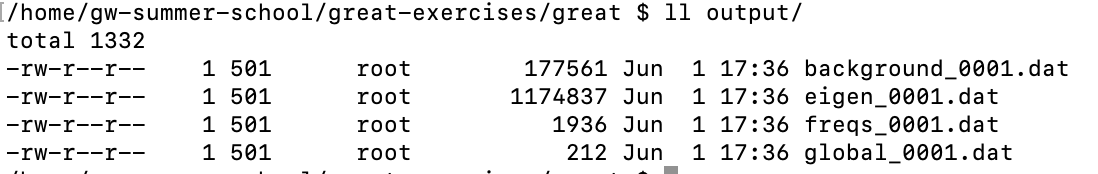

**<font color="blue">  Try it yourself and chek that you are able to produce the files  </font>**


## Output files

* ``output/global_0001.dat``: Global properties of the background (time, radius, mass, number of points)
* ``output/background_0001.dat``: Radial profiles of the background
* ``output/freqs_0001.dat`` : Eigenvalues 
* ``output/eigen_0001.dat`` : Eigenfunctions

Take some time to take a look at these files (you can open them in a text editor).

I have prepared some data readers to ease the use of the data in the files.

### Background files

To the background file with index 1 (``output/background_0001.dat``) use

In [ ]:
dir="../output"
bg=great.ReadBackground(dir,1)

``bg`` is a [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) database containing all the background variables:

In [ ]:
bg.keys()

You can access the arrays as ``bg.rho``  (e.g. for $\rho$) or particular elements as ``bg.rho[0]`` (remember that in python indices start at 0). **<font color="blue">  Try now this by yourself:  </font>**

In [ ]:
## you can type here...

You can also plot the data using matplotlib:

In [ ]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(bg.r,bg.rho)
plt.ylabel(r"$\rho$")
plt.xlabel(r"$r$")
plt.show()

**<font color="blue">  Check that the background variables are set to the values of the test  given above:  </font>**

### Eigenvalues and eigenfunctions

The eigenvalues and eigenfunctions can be read as:

In [ ]:
EigenFreq, EigenFunc=great.ReadEigenfunctions(dir,1)

``EigenFreq`` is a very simple database containing the eigenfrequencies:

In [ ]:
print(EigenFreq.freqs)

**<font color="blue">  Check that the values computed by great are the ones expected theoretically.  </font>**

``EigenFunc`` is abit more complex since it contains the radial profiles of $\eta_r$ and $\eta_\perp$ form each eigenvalue. To access the arrays for the first frequency (0) use ``EigenFunc.r[0]``, ``EigenFunc.etar[0]``, ``EigenFunc.etap[0]``. To get one particular value of the variables (e.g. central value of $\eta_r$) you can ``EigenFunc.etar[0][0]``. Now you can use this to plot the profiles (note that $\eta_r$ has units of length nad $\eta_\perp$ of length$^2$ so it is convenient to always plot $\eta_\perp/r$)

In [ ]:
nf=0 # <== change the eigenfunction here
plt.figure(figsize=(4,3),dpi=150)
plt.title(r"$\sigma_%1g=%3.3f$" % (nf,EigenFreq.freqs[nf]))
plt.plot(EigenFunc.r[nf],EigenFunc.etar[nf], label=r"$\eta_r$")
plt.plot(EigenFunc.r[nf],EigenFunc.etap[nf]/EigenFunc.r[nf], label=r"$\eta_\perp/r$")
plt.xlabel(r"$r$")
plt.legend()
plt.show()

**<font color="blue">  Check that the functions match the theoretical expectations. Use ``spherical_jn`` that computes the spherical Bessel function and its first derivative. The [reference page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_jn.html) may provide some help or just type and execute ``spherical_jn?`` </font>**



## Trying different parameters 

We are going to play with the parameters under the section "Parameters for the coarse eigenmode search" which allow to change the frequency interval search, the number of points for the coarse grid and to search for imaginary eigenvalues. **<font color="blue"> Try to reply the next three questions: </font>**

* Are there eigenvalues below the ones computed above? And above?
* Compute the first 150 eigenfrequencies? What are the limitations you find? Why?
* Are there purely imaginary eigenvalues? 
   